https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html
n_classesint, default=2

In [3]:
# xgboost for classification
from numpy import asarray
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from matplotlib import pyplot
# define dataset
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=1)
# evaluate the model
model = XGBClassifier()
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))
# fit the model on the whole dataset
model = XGBClassifier()
model.fit(X, y)
# make a single prediction
row = [2.56999479, -0.13019997, 3.16075093, -4.35936352, -1.61271951, -1.39352057, -2.48924933, -1.93094078, 3.26130366, 2.05692145]
row = asarray(row).reshape((1, len(row)))
yhat = model.predict(row)
print('Prediction: %d' % yhat[0])

Accuracy: 0.936 (0.019)
[16:45:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Prediction: 1


C:\Users\In-Ho Lee\.conda\envs\testAI\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


It has gained much popularity and attention recently as the algorithm of choice for many winning teams of machine learning competitions.

In [4]:
# First XGBoost model for Pima Indians dataset
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
# load data
dataset = loadtxt('C:/Users/In-Ho Lee/testAI/scikitlearn_keras_examples/pima-indians-diabetes.csv', delimiter=",")
# split data into X and y
X = dataset[:,0:8]
Y = dataset[:,8]
# split data into train and test sets
seed = 77
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)
# fit model no training data
model = XGBClassifier()
model.fit(X_train, y_train)
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

[16:45:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy: 71.26%


[09:07:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[0.10621197 0.2424023  0.08803366 0.07818192 0.10381887 0.1486732
 0.10059207 0.13208601]


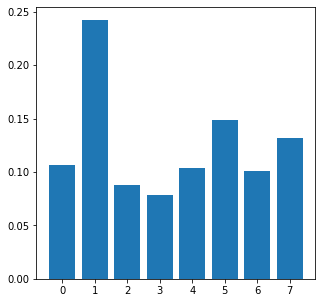

In [10]:
#     plot feature importance manually
from numpy import loadtxt
from xgboost import XGBClassifier
from matplotlib import pyplot
#     load data
dataset = loadtxt('C:/Users/In-Ho Lee/testAI/scikitlearn_keras_examples/pima-indians-diabetes.csv', delimiter=",")
#     split data into X and y
X = dataset[:,0:8]
y = dataset[:,8]
#     fit model no training data
model = XGBClassifier()
model.fit(X, y)
#     feature importance
print(model.feature_importances_)
#     plot
pyplot.bar(range(len(model.feature_importances_ )), model.feature_importances_ )
pyplot.rcParams['figure.figsize'] = [2, 2]
pyplot.show()


[09:04:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


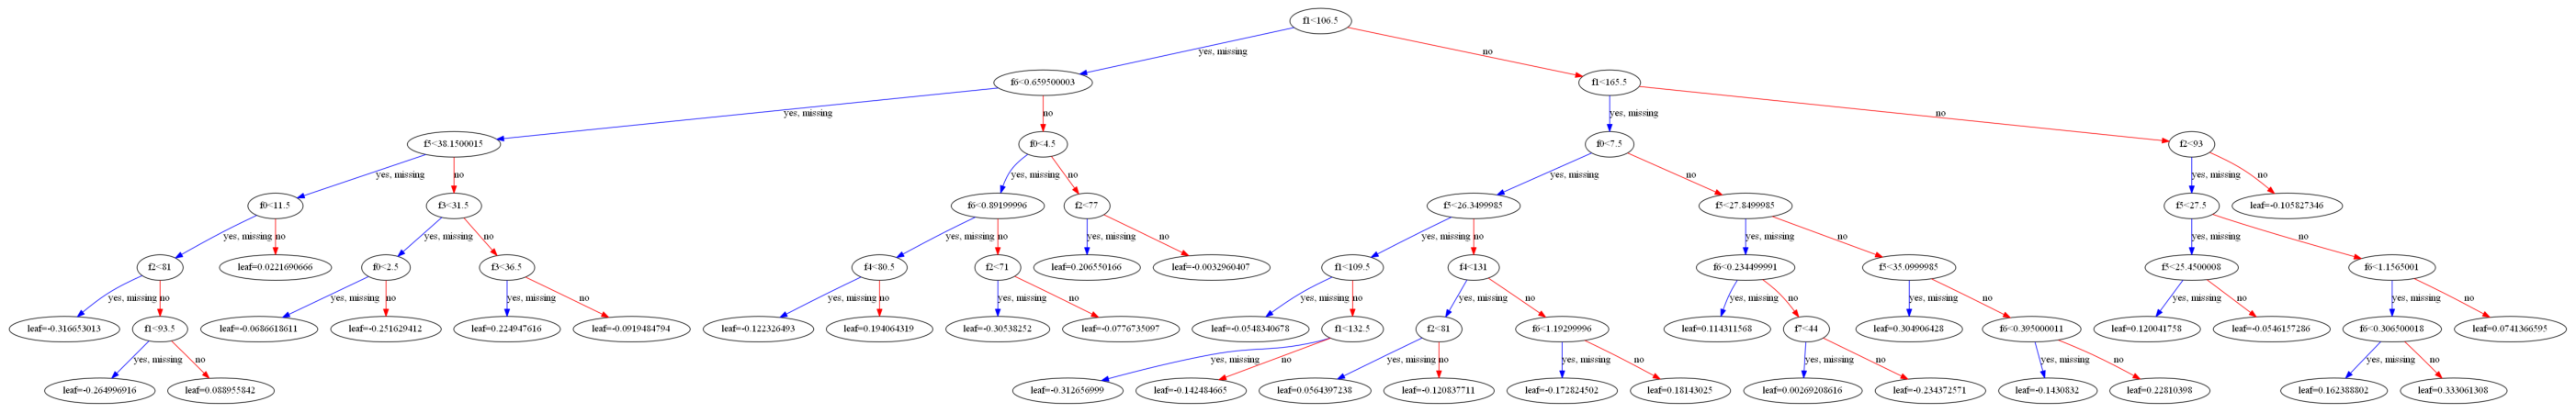

In [8]:
#      plot decision tree
from numpy import loadtxt
from xgboost import XGBClassifier
from xgboost import plot_tree
import matplotlib.pyplot as plt
#      load data
dataset = loadtxt('C:/Users/In-Ho Lee/testAI/scikitlearn_keras_examples/pima-indians-diabetes.csv', delimiter=",")
#      split data into X and y
X = dataset[:,0:8]
y = dataset[:,8]
#      fit model no training data
model = XGBClassifier()
model.fit(X, y)
#      plot single tree
#plot_tree(model)
plot_tree(model, num_trees=4)
#plot_tree(model, num_trees=0, rankdir='LR')
plt.rcParams['figure.figsize'] = [90, 30]
plt.show()
